In [ ]:
import pydicom
import os
import torch
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from tqdm import tqdm
from datetime import datetime
import SimpleITK as sitk
import argparse
import time
sys.path.append('/home/hvv/Documents/git_repo')
#from utils.utils import rtrn_np, list_files, try_t_str, all_tag_values, exists, is_ascending
#from utils.preprocess import dcm2sitk, Resample_slices
#from utils.preprocess import *
#from utils.TOSHIBA import toshiba_ID, create_mdct , toshiba_get_metadata #, default_CTP_registration_args
#from utils.registration import default_registration_args, apply_transform, register_images
root = '/media/hvv/ec2480e5-6c18-468c-b971-5271432b386d/hvv/Toshiba_sc'
#list_files(root)

dt_formats = ["%Y%m%d%H%M%S","%Y%m%d%H%M%S.%f", #datetimeformats
           "%d%m%Y%H%M%S", "%d%m%Y%H%M%S.%f", #datetimeformats
           "%m%d%Y%H%M%S.%f" "%m%d%Y%H%M%S", #datetimeformats
           "%Y%m%d",  "%d%m%Y","%m%d%Y", #date formats
           "%H%M%S", "%H%M%S.%f", #time formats
          ]

#timecols = [c for c in mdata.columns if 'Date' in c or 'Time' in c]
print('Hello')


In [ ]:
out = []
T_pixeldata = []
for ID in tqdm(os.listdir(root)):
    if not 'TOSH' in ID:
        print('Wrong ID type:', ID)
        continue
    # create paths of interest
    pid = os.path.join(root, ID)
    p_dcmdir = os.path.join(pid, 'DCM')
    #Get all dicomtag metadata in a file and store it
    #perform sanity check of time order with 'AcquisitionDateTime'
    mdata = toshiba_get_metadata(p_dcmdir, time_dcm_tag='AcquisitionDateTime')
    mdata['ID'] = ID
    
    
    # Retrieve all volume 
    break

mdata.head(1)

In [5]:
register = True
sloc_org_nii = os.path.join(pid,'NII')
sloc_reg_nii = os.path.join(pid,'REG')
sloc_trans_files = os.path.join(pid,'transform_files')

#mdata

minVolno = mdata['Volno'].min() 
for no, file in zip(mdata['Volno'].values, mdata['dcmfile'].values):
    img = sitk.ReadImage(file)
    img = Resample_img(img, new_spacing=2, interpolator=sitk.sitkBSplineResamplerOrder3)
    img = sitk.Cast(sitk.Clamp(img, lowerBound=-1024, upperBound=1000), sitk.sitkInt16)
    if sloc_org_nii is not None:
        exists(sloc_org_nii)
        sitk.WriteImage(img, os.path.join(sloc_org_nii, str(no)+'.nii.gz'))
    if register:       
        #store first volume to register to
        
        if no==minVolno:
            start_img = img
            #output_img = clip_img
        else:
            print(no,file)
            break
            #registration to obtain transform files

            if sloc_reg_nii is not None:
                exists(sloc_reg_nii)
                #mvimg, transform = register_images_sitk(start_img, img, args)
                #sitk.WriteImage(mvimg, os.path.join(sloc_reg_nii,str(no)+'.nii.gz'))
    
            #use transform files to register original images
            if sloc_trans_files is not None:
                exists(sloc_trans_files)
                f_trans = os.path.join(sloc_trans_files,str(no)+'.trans')
    
    #arr = sitk.GetArrayFromImage(img)
    #arr = np.clip(arr,-1024,1000)
    #dct_vols[IDno] = arr
    print(no,file)


1 /media/hvv/ec2480e5-6c18-468c-b971-5271432b386d/hvv/Toshiba_sc/TOSH001/DCM/dcm_01.dcm
2 /media/hvv/ec2480e5-6c18-468c-b971-5271432b386d/hvv/Toshiba_sc/TOSH001/DCM/dcm_02.dcm


In [ ]:
args = default_registration_args()
args

In [7]:
t1 = time.time()
mvimg, transform = register_images_sitk(start_img, img, args)
t2 = time.time()
print(t2-t1)

1096.9757618904114


In [16]:
#transform_file = 
#sitk.WriteTransform(transform, transform_filename)
exists(sloc_reg_nii)


In [19]:
from distutils.sysconfig import get_python_inc; 
print(get_python_inc())

/home/hvv/anaconda/envs/py39/include/python3.9


In [ ]:

def toshiba_get_pixeldata(metadata, sloc: str, register=False):
    """
    Converts volume dicoms to nifti
    and registers to the first frame if required
    returns CTP array (dims=t,z,y,x)
    """
    
    

    return CTP

In [18]:
if sloc is not None:
    sloc = os.path.join(sloc, ID)
    exists(sloc)
    metadata.to_excel(os.path.join(sloc, 'metadata.xlsx'))
    metadata.to_pickle(os.path.join(sloc, 'metadata.pic'))

In [17]:

#mdata
timevar = 'AcquisitionDateTime'
times = np.array([try_t_str(t,dt_formats) for t in mdata[timevar].values])
ascends = is_ascending(times)


mdata.iloc[:3,-8:]

,[VolumeType],[RelativeTablePositionof4DVolume],[AbsoluteTablePositionof4DVolume],[SlicePitchof4DVolume],Volno,ID,dcmdir,newtimevar
0,2,+87.50,-427.00,0.500,1,TOSH001,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...,2011-06-15 07:41:05.275
1,2,+87.50,-427.00,0.500,2,TOSH001,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...,2011-06-15 07:41:09.225
2,2,+87.50,-427.00,0.500,3,TOSH001,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...,2011-06-15 07:41:11.175


In [36]:
pixeldata=True
save = True

t1 = time.time()
for ID in tqdm(os.listdir(root)):
    if not 'TOSH' in ID:
        print('Wrong ID type:',ID)
        continue
    #create paths of interest
    pid = os.path.join(root,ID)
    p_dcmdir = os.path.join(pid,'DCM')
    if save:
        p_niidir = os.path.join(pid,'NII')
        exists(p_niidir)
    dcm_files = os.listdir(p_dcmdir)
    #store Volume ID and location
    df = toshiba_ID(p_dcmdir) #is already sorted by timepoints
    minIDno = df.IDno.min() #to get first frame
    
    #try_t_str(datestring=df.AcquisitionTime.iloc[0], t_str=None)

    #process all scans
    scan_mdata = []
    dct_vols = {}
    for __,(IDno,IDstr,p) in df.iterrows():
        #dcm = pydicom.dcmread(p, stop_before_pixels=True)
        if pixeldata:

    
    break
t2 = time.time()
print(t2-t1)

ctp = np.vstack(T_pixeldata)

  0%|                                                    | 0/28 [00:08<?, ?it/s]


8.505443334579468


In [40]:
df

,IDno,IDstr,path
0,1,01,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
1,2,02,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
2,3,03,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
3,4,04,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
4,5,05,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
5,6,06,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
6,7,07,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
7,8,08,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
8,9,09,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...
9,10,10,/media/hvv/ec2480e5-6c18-468c-b971-5271432b386...


In [29]:
#dtimes
#img = dcm2sitk(p_dcmdir)
img = sitk.ReadImage(p)
arr = sitk.GetArrayFromImage(img)
print(img.GetSize(),arr.shape)

(512, 512, 320) (320, 512, 512)


In [ ]:
dirs = os.listdir(root)
ID = dirs[0]
pid = os.path.join(root,ID)
p_dcmdir = os.path.join(pid,'DCM')
dcm_files = os.listdir(p_dcmdir)
f = os.path.join(p_dcmdir,dcm_files[0])
img = sitk.ReadImage(f)
arr = sitk.GetArrayFromImage(img)
arr = np.clip(arr,-1024,1000)

In [ ]:
sns.distplot(arr[100].flatten())
plt.show()

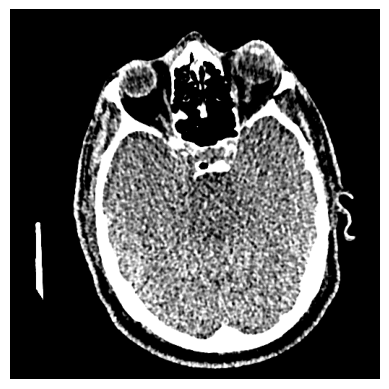

In [12]:
plt.imshow(np.clip(arr[100],0,100),cmap='gray')
plt.axis('off')
plt.show()